In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
data = pd.read_csv('all_in_1_w_more_feat.csv', header=0)

In [3]:
data.columns

Index([u'Unnamed: 0', u'attitudes_count', u'comments_count', u'id',
       u'reposts_count', u'user.badge.anniversary', u'user.badge.asiad_2018',
       u'user.badge.bind_taobao', u'user.badge.cz_wed_2017',
       u'user.badge.dailv', u'user.badge.dailv_2018',
       u'user.badge.denglong_2019', u'user.badge.double11_2018',
       u'user.badge.dzwbqlx_2016', u'user.badge.follow_whitelist_video',
       u'user.badge.fu_2019', u'user.badge.gongyi', u'user.badge.gongyi_level',
       u'user.badge.hongbaofei_2019', u'user.badge.kpl_2018',
       u'user.badge.league_badge', u'user.badge.lol_gm_2017',
       u'user.badge.lol_msi_2017', u'user.badge.lol_s8',
       u'user.badge.meilizhongguo_2018', u'user.badge.memorial_2018',
       u'user.badge.national_day_2018', u'user.badge.panda',
       u'user.badge.qixi_2018', u'user.badge.status_visible',
       u'user.badge.suishoupai_2018', u'user.badge.super_star_2017',
       u'user.badge.super_star_2018', u'user.badge.travel_2017',
       u'user

In [4]:
data.dtypes

Unnamed: 0                             int64
attitudes_count                        int64
comments_count                         int64
id                                     int64
reposts_count                          int64
user.badge.anniversary               float64
user.badge.asiad_2018                float64
user.badge.bind_taobao               float64
user.badge.cz_wed_2017               float64
user.badge.dailv                     float64
user.badge.dailv_2018                float64
user.badge.denglong_2019             float64
user.badge.double11_2018             float64
user.badge.dzwbqlx_2016              float64
user.badge.follow_whitelist_video    float64
user.badge.fu_2019                   float64
user.badge.gongyi                    float64
user.badge.gongyi_level              float64
user.badge.hongbaofei_2019           float64
user.badge.kpl_2018                  float64
user.badge.league_badge              float64
user.badge.lol_gm_2017               float64
user.badge

In [5]:
data.head()

,Unnamed: 0,attitudes_count,comments_count,id,reposts_count,user.badge.anniversary,user.badge.asiad_2018,user.badge.bind_taobao,user.badge.cz_wed_2017,user.badge.dailv,...,default_name_cat,garbled_name_cat,ch_name_cat,en_name_cat,vip_cat,followers_cat,default_cont_cat,intro_cat,device_cat,Effective
0,0,0,0,4327742222747234,0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1
1,1,0,0,4324519222687127,0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0,1
2,2,0,0,4324171619849135,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1
3,3,0,0,4323656345349198,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1
4,4,0,0,4323336907448716,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1


In [6]:
data.isnull().any()

Unnamed: 0                           False
attitudes_count                      False
comments_count                       False
id                                   False
reposts_count                        False
user.badge.anniversary               False
user.badge.asiad_2018                False
user.badge.bind_taobao               False
user.badge.cz_wed_2017               False
user.badge.dailv                     False
user.badge.dailv_2018                False
user.badge.denglong_2019             False
user.badge.double11_2018             False
user.badge.dzwbqlx_2016              False
user.badge.follow_whitelist_video    False
user.badge.fu_2019                   False
user.badge.gongyi                    False
user.badge.gongyi_level              False
user.badge.hongbaofei_2019           False
user.badge.kpl_2018                  False
user.badge.league_badge              False
user.badge.lol_gm_2017               False
user.badge.lol_msi_2017              False
user.badge.

In [7]:
len(data)

8997

In [8]:
data['Effective'].value_counts()

1    6526
0    2471
Name: Effective, dtype: int64

In [9]:
data['comments_count'].unique()

array([ 0,  1,  4,  2, 42])

## upsampling

In [10]:
from sklearn.utils import resample

In [11]:
data_majority = data[data['Effective']==1]
data_minority = data[data['Effective']==0]

data_minority_upsampled = resample(data_minority, replace=True, n_samples=6526, random_state=1)
data = pd.concat([data_majority, data_minority_upsampled])

data['Effective'].value_counts()

1    6526
0    6526
Name: Effective, dtype: int64

## logistic regression

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [13]:
X = data.drop(labels=['Effective', 'id'], axis=1)
Y = data['Effective'].values

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [15]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
from sklearn import metrics

In [17]:
test_prediction = lr.predict(X_test)

In [18]:
print(metrics.accuracy_score(Y_test, test_prediction))

0.8286852589641435


In [19]:
weights = pd.Series(lr.coef_[0], index=X.columns.values)
weights.sort_values(ascending = False)

vip_num                              2.747795
user.badge.user_name_certificate     1.955120
device_cat                           0.690476
attitudes_count                      0.687686
ch_name_cat                          0.578398
default_name_cat                     0.524421
user.badge.qixi_2018                 0.479296
user.badge.super_star_2017           0.432708
user.badge.womensday_2018            0.432301
user.badge.bind_taobao               0.414782
user.badge.super_star_2018           0.346611
user.badge.zongyiji                  0.334720
default_cont_cat                     0.331397
user.badge.suishoupai_2018           0.292163
user.badge.double11_2018             0.267922
user.badge.wenda_v2                  0.259342
comments_count                       0.234934
en_name_cat                          0.224116
user.badge.gongyi_level              0.195647
user.badge.dailv_2018                0.168422
user.badge.dailv                     0.161856
verified_cat                      

## cross validation

In [20]:
from sklearn.model_selection import KFold,cross_val_score

In [21]:
k_fold = KFold(n_splits=10)

In [22]:
lr_model = LogisticRegression()

In [23]:
kf_scores = np.array([])

In [24]:
for train, test in k_fold.split(X):
    temp = lr_model.fit(X.iloc[train, :], Y[train]).score(X.iloc[test, :], Y[test])
    kf_scores = np.append(kf_scores, temp)

In [25]:
kf_scores.mean()

0.8053019661685237

## with PCA

In [26]:
from sklearn.decomposition import PCA

In [27]:
def run_pca(num, folds):
    pca = PCA(n_components=num)
    principalComponents = pca.fit_transform(X)

    pcaDF = pd.DataFrame(data = principalComponents)
    pca_scores = np.array([])
    k_fold = KFold(n_splits=folds)
    for train, test in k_fold.split(pcaDF):
        temp = lr_model.fit(pcaDF.iloc[train, :], Y[train]).score(pcaDF.iloc[test, :], Y[test])
        pca_scores = np.append(pca_scores, temp)
#     print(pca_scores)
#     print(pca_scores.mean())
    return pca_scores.mean()

In [28]:
pca_mean = []
for n in range(5, 65, 5):
    for f in range(5, 11):
#         print("--- # of components: {} with {} folds ---".format(n, f))
        pca_mean.append(run_pca(n, f))

In [29]:
x = np.reshape(pca_mean, (12, 6))
x_df = pd.DataFrame(x)
x_df.columns = ['5 fold', '6 fold', '7 fold', '8 fold', '9 fold', '10 fold']

In [30]:
x_df['component'] = np.array(list(range(5, 65, 5)))
x_df.set_index('component')

,5 fold,6 fold,7 fold,8 fold,9 fold,10 fold
component,,,,,,
5,0.316374,0.382155,0.469521,0.398756,0.441612,0.523635
10,0.675615,0.677054,0.721903,0.717317,0.733823,0.718338
15,0.714455,0.704640,0.767332,0.760602,0.770372,0.759332
20,0.754146,0.770460,0.773466,0.775853,0.784011,0.785077
25,0.757902,0.772376,0.782659,0.781904,0.782555,0.792662
30,0.753073,0.768775,0.783502,0.780756,0.780716,0.790746
35,0.772152,0.773295,0.790011,0.792398,0.789602,0.802390
40,0.768858,0.778505,0.785647,0.780069,0.800631,0.799480
45,0.758667,0.791913,0.790318,0.787267,0.795499,0.803311


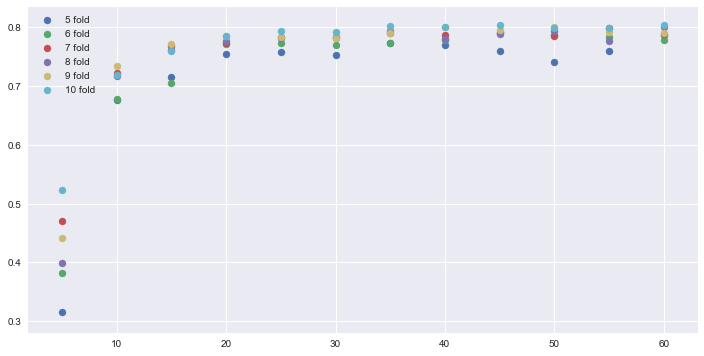

In [35]:
plt.figure(figsize=(12,6))
for col in x_df.columns[0:-1]:
    plt.scatter(x_df['component'], x_df[col], s=50)
plt.legend(numpoints=1)

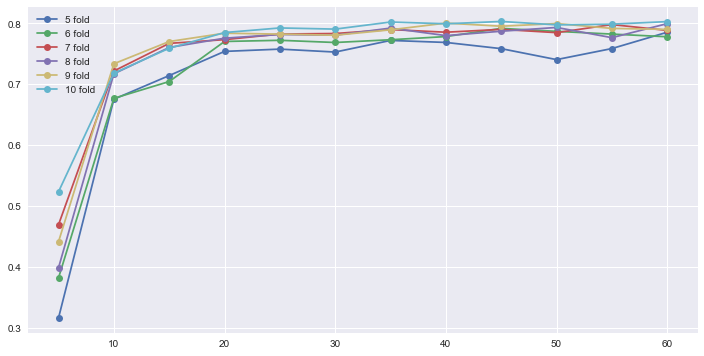

In [34]:
plt.figure(figsize=(12,6))
for col in x_df.columns[0:-1]:
    plt.plot(x_df['component'], x_df[col], '-o')
plt.legend(numpoints=1)